In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
import sys

In [2]:
sys.path.insert(0,"../src/ext-libraries/SingularSpectrumAnalysis/")
from mySSA import mySSA

In [3]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [4]:
train_df.drop(columns=['AP_3'], inplace=True)
test_df.drop(columns=['AP_3'], inplace=True)

In [9]:
chunk_train_df = train_df[(train_df.index >= '2010-10-01') & (train_df.index < '2010-11-01')]
ts = chunk_train_df.AP_1

In [10]:
ssa = mySSA(ts)

In [12]:
len(ts)

1891

In [11]:
N = int(len(ts)) # number of samples
T = 96 # sample daily frequency (4 samples per hour)
embedding_dimension =  int(N / T)

ssa.embed(embedding_dimension=embedding_dimension,verbose=True)

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  19
Trajectory dimensions	: (19, 1873)
Complete dimension	: (19, 1873)
Missing dimension     	: (19, 0)


In [13]:
ssa.decompose(verbose=True)

----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 19
Dimension of projection space	: 19
Characteristic of projection	: 1.0


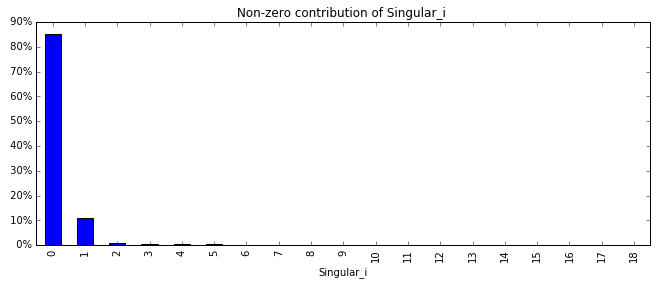

In [16]:
# First enable display of graphs in the notebook
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 4

ssa.view_s_contributions(adjust_scale=False)

In [15]:
ssa.s_contributions

,Contribution
0,0.8517
1,0.1088
2,0.0106
3,0.0048
4,0.0035
5,0.0027
6,0.0024
7,0.0020
8,0.0017
9,0.0014


In [ ]:
rcParams['figure.figsize'] = 11, 2
for i in range(3):
    ssa.view_reconstruction(ssa.Xs[i], names=i, symmetric_plots=i!=0)
rcParams['figure.figsize'] = 11, 4

In [ ]:
[i for i in range(2)]

In [ ]:
ssa.ts.plot(title='Original Time Series'); # This is the original series for comparison
streams5 = [i for i in range(2)]
reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, plot=False, return_df=True)

In [ ]:
plt.plot(reconstructed5)